# Busca Linear

In [18]:
import numpy as np

Vamos analisar o que acontece na função de Rosenbrock:

In [2]:
def rosenbrock(x):
    return (1-x[0])**2+10*(x[1]-x[0]**2)**2

Agora, defina o raio da busca linear:

In [4]:
def phi(alpha, x, p, fun):
    return fun(x+alpha*p)

Observe:

In [22]:
def grad_rosenbrock(x):
    return np.asarray([2+2*x[0]-40*x[0]*(x[1]-x[0]**2), 20*(x[1]-x[0]**2)])

Partindo, por exemplo, do ponto $x=(0,1)$, temos:

In [78]:
x = np.asarray([0,1])

In [79]:
rosenbrock(x)

11

In [80]:
p = -grad_rosenbrock(x)

De fato, $p$ é uma direção de descida:

In [81]:
import numpy as np

print(np.dot(grad_rosenbrock(x), p))

-404


Partindo de $\alpha=1$, temos: 

In [82]:
phi(1, x, p, rosenbrock)

5299

Vamos ver $\phi$:

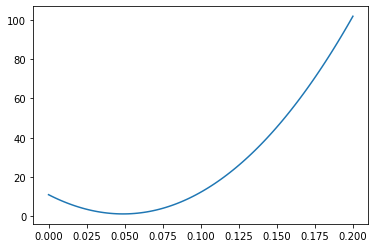

In [83]:
import matplotlib.pyplot as plt

alpha = np.linspace(0, 0.2, 100)
valores_phi = [phi(a, x, p, rosenbrock) for a in alpha]
plt.plot(alpha, valores_phi)

## Condições de Wolfe

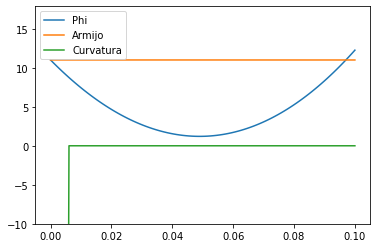

In [85]:
fig, ax = plt.subplots()
alpha = np.linspace(0, 0.1, 100)
valores_phi = [phi(a, x, p, rosenbrock) for a in alpha]
ax.plot(alpha, valores_phi)

# Condição de Armijo:
###
# Escolha valores aqui:
c_1 = 1e-4
###
valores_armijo = [rosenbrock(x)+c_1*a*np.dot(grad_rosenbrock(x), p) for a in alpha]
ax.plot(alpha, valores_armijo)

# Condição de Curvatura:
###
# Escolha valores aqui:
c_2 = 0.9
###
valores_curvatura = [0 if np.dot(grad_rosenbrock(x+a*p), p) >= c_2*np.dot(grad_rosenbrock(x), p) else -100 for a in alpha]
ax.plot(alpha, valores_curvatura)
ax.set_ylim(bottom=-10)

ax.legend(['Phi', 'Armijo', 'Curvatura'])